# Data Mining Analysis of mechanisms- based classification of musculoskeletal pain in clinical practice 

## Dataset: 
The data from this study are a sample of 464 patients, each one assigned to one of the three types of pain by a group of experienced physiotherapists. The assessment was carried out according to a list of 36 binary clinical indicators (“Present”/“Absent”). These indicators are selected on an expert consensus basis regarding symptoms and features of the patients.

## Our Study: 

1. Are there any interesting patterns in the presence/absence clinical criteria for lower back pain? <br>
2. Do the patients form groups with similar presence/absence clinical criteria? Do these groups have a connection with the clinical pain types?
3. Can we use the presence/absence clinical criteria to accurately predict the clinical pain types?




## Implementing Association Rules mining to find the frequent symptoms

In [179]:
import pandas as pd
import numpy as np

In [180]:
data = pd.read_csv('dataupdated.csv')

### Data Preprocessing

In [182]:
data.head()

,No,recent_pain,assoc_trauma,nerve_injury_history,X4,disp_pain,intermitt,burning,localised,referred,...,non_mechanical,pos_neurological,local_palpation,Diffuse,allodynia,hyperalgesia,hyperpathia,palpation_neural_tissues,identification_psychosocial,assignedlabels
0,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,Nociceptive
1,2,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Nociceptive
2,3,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,Nociceptive
3,4,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,PeripheralNeuropathic
4,5,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Nociceptive


In [217]:
data.columns

Index(['No', 'recent_pain', 'assoc_trauma', 'nerve_injury_history', 'X4',
       'disp_pain', 'intermitt', 'burning', 'localised', 'referred',
       'widespread', 'mech_nature', 'mech_movement', 'disproportionate',
       'spont', 'dyesthesias', 'high_sev', 'neurological_symp', 'night_pain',
       'NSAIDS', 'rapid_resolve', 'pain_persist', 'history_failed',
       'psychosocial', 'functional', 'Antalgic', 'Consistent',
       'compress_neural_tissue', 'non_mechanical', 'pos_neurological',
       'local_palpation', 'Diffuse', 'allodynia', 'hyperalgesia',
       'hyperpathia', 'palpation_neural_tissues',
       'identification_psychosocial', 'assignedlabels'],
      dtype='object')

In [181]:
data.describe()

,No,recent_pain,assoc_trauma,nerve_injury_history,X4,disp_pain,intermitt,burning,localised,referred,...,compress_neural_tissue,non_mechanical,pos_neurological,local_palpation,Diffuse,allodynia,hyperalgesia,hyperpathia,palpation_neural_tissues,identification_psychosocial
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,...,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,232.500000,0.150862,0.719828,0.327586,0.243534,0.767241,0.232759,0.370690,0.696121,0.310345,...,0.318966,0.193966,0.215517,0.696121,0.183190,0.090517,0.303879,0.221983,0.221983,0.293103
std,134.089522,0.358301,0.449568,0.469840,0.429678,0.423046,0.423046,0.483511,0.460428,0.463134,...,0.466579,0.395829,0.411624,0.460428,0.387239,0.287231,0.460428,0.416028,0.416028,0.455677
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,232.500000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,348.250000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,464.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [183]:
data.count()

No                             464
recent_pain                    464
assoc_trauma                   464
nerve_injury_history           464
X4                             464
disp_pain                      464
intermitt                      464
burning                        464
localised                      464
referred                       464
widespread                     464
mech_nature                    464
mech_movement                  464
disproportionate               464
spont                          464
dyesthesias                    464
high_sev                       464
neurological_symp              464
night_pain                     464
NSAIDS                         464
rapid_resolve                  464
pain_persist                   464
history_failed                 464
psychosocial                   464
functional                     464
Antalgic                       464
Consistent                     464
compress_neural_tissue         464
non_mechanical      

In [184]:
data_2 = data.drop([ 'assignedlabels',"No"], axis=1)


The first 36 columns in the data matrix indicated the absence or presence of a pain type. Each code
referred to a pain described. The assigned.label column indicated the clinical assignment in
one of three categories Nociceptive (NP), Peripheral Neuropathic (PN) and Central Sensitization (CN)

In [185]:
data_2.head()

,recent_pain,assoc_trauma,nerve_injury_history,X4,disp_pain,intermitt,burning,localised,referred,widespread,...,compress_neural_tissue,non_mechanical,pos_neurological,local_palpation,Diffuse,allodynia,hyperalgesia,hyperpathia,palpation_neural_tissues,identification_psychosocial
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
3,0,1,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Getting some more insights of Data.
#### Finding the afftected and non affected patients 

In [186]:
Total_affected_and_not_affected = data_2.apply(pd.value_counts).fillna(0).sum(axis=1)

most_common = data_2.apply(pd.value_counts).fillna(0)



In [187]:
Total_affected_and_not_affected.head()

0    10718
1     5986
dtype: int64

In [188]:
most_common.head()

,recent_pain,assoc_trauma,nerve_injury_history,X4,disp_pain,intermitt,burning,localised,referred,widespread,...,compress_neural_tissue,non_mechanical,pos_neurological,local_palpation,Diffuse,allodynia,hyperalgesia,hyperpathia,palpation_neural_tissues,identification_psychosocial
0,394,130,312,351,108,356,292,141,320,391,...,316,374,364,141,379,422,323,361,361,328
1,70,334,152,113,356,108,172,323,144,73,...,148,90,100,323,85,42,141,103,103,136


### Checking the Null Values again

In [189]:
data_2.isnull().values.any()

False

In [190]:
data_2.isnull().sum()

recent_pain                    0
assoc_trauma                   0
nerve_injury_history           0
X4                             0
disp_pain                      0
intermitt                      0
burning                        0
localised                      0
referred                       0
widespread                     0
mech_nature                    0
mech_movement                  0
disproportionate               0
spont                          0
dyesthesias                    0
high_sev                       0
neurological_symp              0
night_pain                     0
NSAIDS                         0
rapid_resolve                  0
pain_persist                   0
history_failed                 0
psychosocial                   0
functional                     0
Antalgic                       0
Consistent                     0
compress_neural_tissue         0
non_mechanical                 0
pos_neurological               0
local_palpation                0
Diffuse   

# Implementing apriori algorithm to get frequent symptoms and finding the connections among the symptoms

In [191]:
from mlxtend.frequent_patterns import apriori, association_rules 


In [194]:

# Building the model 
frq_items = apriori(data_2, min_support=0.65, use_colnames=True)

  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 


In [195]:
print(rules.head())

                    antecedents    consequents  antecedent support  \
20   (Consistent, assoc_trauma)  (mech_nature)            0.683190   
14    (disp_pain, assoc_trauma)  (mech_nature)            0.661638   
26      (Consistent, disp_pain)  (mech_nature)            0.676724   
3                (assoc_trauma)  (mech_nature)            0.719828   
19  (mech_nature, assoc_trauma)   (Consistent)            0.696121   

    consequent support   support  confidence      lift  leverage  conviction  
20            0.760776  0.672414    0.984227  1.293715  0.152660   15.166810  
14            0.760776  0.650862    0.983713  1.293040  0.147504   14.688362  
26            0.760776  0.661638    0.977707  1.285145  0.146803   10.730911  
3             0.760776  0.696121    0.967066  1.271157  0.148493    7.263715  
19            0.752155  0.672414    0.965944  1.284235  0.148823    7.277625  


# Visualizations

In [21]:
import matplotlib.pyplot as plt

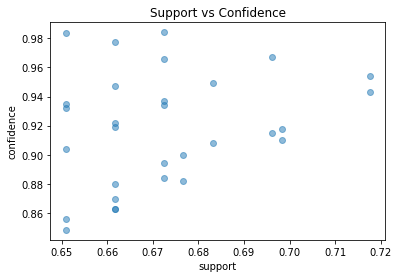

In [22]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

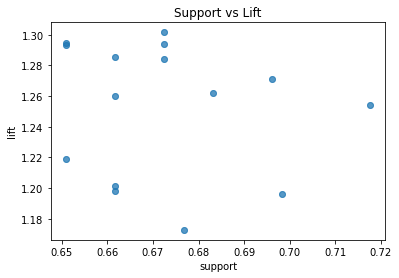

In [23]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

# Connected symptoms visualization

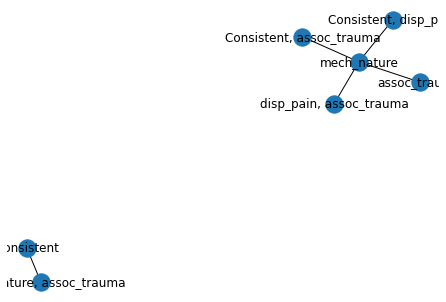

In [205]:
import networkx as nx 
# importing matplotlib.pyplot 
import matplotlib.pyplot as plt 
  
g = nx.Graph() 
  
g.add_edge ('Consistent, assoc_trauma', 'mech_nature')
g.add_edge('disp_pain, assoc_trauma', 'mech_nature')
g.add_edge('Consistent, disp_pain', 'mech_nature') 
g.add_edge('assoc_trauma','mech_nature') 
g.add_edge('mech_nature, assoc_trauma', 'Consistent')

  
nx.draw(g, with_labels = True)

# Logistic Regression implementation

In terms of Central Sensitization (CN)

In [203]:
data_CN = pd.read_csv('Data_CN1.csv')

In [80]:
data_CN.head()

,recent_pain,assoc_trauma,nerve_injury_history,X4,disp_pain,intermitt,burning,localised,referred,widespread,...,non_mechanical,pos_neurological,local_palpation,Diffuse,allodynia,hyperalgesia,hyperpathia,palpation_neural_tissues,identification_psychosocial,assignedlabels
0,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
data_CN.columns

Index(['recent_pain', 'assoc_trauma', 'nerve_injury_history', 'X4',
       'disp_pain', 'intermitt', 'burning', 'localised', 'referred',
       'widespread', 'mech_nature', 'mech_movement', 'disproportionate',
       'spont', 'dyesthesias', 'high_sev', 'neurological_symp', 'night_pain',
       'NSAIDS', 'rapid_resolve', 'pain_persist', 'history_failed',
       'psychosocial', 'functional', 'Antalgic', 'Consistent',
       'compress_neural_tissue', 'non_mechanical', 'pos_neurological',
       'local_palpation', 'Diffuse', 'allodynia', 'hyperalgesia',
       'hyperpathia', 'palpation_neural_tissues',
       'identification_psychosocial', 'assignedlabels'],
      dtype='object')

In [123]:
data_CN.shape

(464, 37)

In [124]:
features = data_CN ['recent_pain']

In [127]:
X = data_CN[::-1]
Y = data_CN.assignedlabels

In [128]:
X.shape

(464, 37)

In [129]:
Y.shape

(464,)

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [131]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [132]:
model.fit(X, Y)


LogisticRegression(random_state=0, solver='liblinear')

In [134]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, Y)


In [135]:
model.intercept_

array([-1.20480488])

In [136]:
model.score(X, Y)

0.7866379310344828

In [139]:
confusion_matrix(Y, model.predict(X))

array([[352,   6],
       [ 93,  13]])

In [142]:
print(classification_report(Y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       358
           1       0.68      0.12      0.21       106

    accuracy                           0.79       464
   macro avg       0.74      0.55      0.54       464
weighted avg       0.77      0.79      0.72       464



In [225]:
#Improve the model
model = LogisticRegression(solver='liblinear', C=20.0, random_state=0)
model.fit(X, Y)


LogisticRegression(C=20.0, random_state=0, solver='liblinear')

In [226]:
model.score(X, Y)

0.790948275862069

In [227]:
print(classification_report(Y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       358
           1       0.67      0.17      0.27       106

    accuracy                           0.79       464
   macro avg       0.73      0.57      0.57       464
weighted avg       0.77      0.79      0.74       464



In [156]:
import statsmodels.api as sm

In [159]:
P = list(Y)
model = sm.Logit(P, X)

In [171]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.473908
         Iterations 7


In [172]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  464
Model:                          Logit   Df Residuals:                      427
Method:                           MLE   Df Model:                           36
Date:                Tue, 09 Jun 2020   Pseudo R-squ.:                  0.1181
Time:                        15:55:12   Log-Likelihood:                -219.89
converged:                       True   LL-Null:                       -249.35
Covariance Type:            nonrobust   LLR p-value:                  0.009346
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
recent_pain                    -0.1273      0.358     -0.356      0.722      -0.829       0.575
assoc_trauma                   -0.3217      0.686     -0.469      0.639      -1.667       1.023
nerve_injury_history           -0.1123      0.490     -0.229      0.819      -1.073       0.849
X4                             -0.1901      0.710     -0.268      0.789      -1.583       1.202
disp_pain                       0.2406      0.575      0.419      0.675      -0.886       1.367
intermitt                       0.4741      0.628      0.754      0.451      -0.758       1.706
burning                        -0.4856      0.324     -1.499      0.134      -1.120       0.149
localised                       0.4030      0.450      0.895      0.371      -0.479       1.285
referred                       -1.3163      0.548     -2.403      0.016      -2.390      -0.243
widespread                      0.4200      0.737      0.570      0.569      -1.024       1.864
mech_nature                    -0.7832      0.731     -1.071      0.284      -2.217       0.650
mech_movement                   0.5276      0.576      0.916      0.360      -0.601       1.656
disproportionate               -0.2898      0.993     -0.292      0.770      -2.237       1.657
spont                           0.3987      0.330      1.209      0.226      -0.247       1.045
dyesthesias                     0.3414      0.383      0.891      0.373      -0.409       1.092
high_sev                       -0.1793      0.520     -0.345      0.730      -1.199       0.840
neurological_symp               0.4615      0.393      1.175      0.240      -0.308       1.231
night_pain                     -0.2097      0.272     -0.771      0.441      -0.743       0.324
NSAIDS                         -0.8056      0.273     -2.952      0.003      -1.340      -0.271
rapid_resolve                   0.4156      0.354      1.173      0.241      -0.279       1.110
pain_persist                   -0.1492      0.367     -0.407      0.684      -0.868       0.569
history_failed                  1.0118      0.336      3.013      0.003       0.354       1.670
psychosocial                   -0.2151      0.543     -0.396      0.692      -1.280       0.850
functional                      0.1087      0.400      0.272      0.786      -0.674       0.892
Antalgic                       -0.1766      0.338     -0.523      0.601      -0.839       0.486
Consistent                      0.1808      0.560      0.323      0.747      -0.917       1.278
compress_neural_tissue          0.0039      0.437      0.009      0.993      -0.852       0.860
non_mechanical                 -1.2281      0.842     -1.459      0.145      -2.878       0.422
pos_neurological                0.0227      0.462      0.049      0.961      -0.883       0.929
local_palpation                -0.2144      0.338     -0.635      0.526      -0.876       0.448
Diffuse                         0.0837      0.647      0.129      0.897  

In [206]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                   Logit               Pseudo R-squared:    0.118    
Dependent Variable:      y                   AIC:                 513.7870 
Date:                    2020-06-09 16:25    BIC:                 666.9628 
No. Observations:        464                 Log-Likelihood:      -219.89  
Df Model:                36                  LL-Null:             -249.35  
Df Residuals:            427                 LLR p-value:         0.0093457
Converged:               1.0000              Scale:               1.0000   
No. Iterations:          7.0000                                            
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
recent_pain                 -0.1273   0.3582 -0.3555 0.7222 -0.8294  0.5747
assoc_trauma                -0.3217   0.6862 -0.4688 0.6392 -1.6666  1.0232
nerve_injury_history        -0.1123   0.4903 -0.2290 0.8188 -1.0733  0.8487
X4                          -0.1901   0.7105 -0.2675 0.7891 -1.5826  1.2024
disp_pain                    0.2406   0.5746  0.4188 0.6754 -0.8856  1.3669
intermitt                    0.4741   0.6285  0.7544 0.4506 -0.7577  1.7059
burning                     -0.4856   0.3239 -1.4993 0.1338 -1.1204  0.1492
localised                    0.4030   0.4500  0.8954 0.3706 -0.4791  1.2850
referred                    -1.3163   0.5477 -2.4033 0.0162 -2.3898 -0.2428
widespread                   0.4200   0.7369  0.5700 0.5687 -1.0242  1.8643
mech_nature                 -0.7832   0.7314 -1.0708 0.2843 -2.2167  0.6503
mech_movement                0.5276   0.5759  0.9161 0.3596 -0.6011  1.6563
disproportionate            -0.2898   0.9932 -0.2918 0.7704 -2.2365  1.6569
spont                        0.3987   0.3296  1.2094 0.2265 -0.2474  1.0447
dyesthesias                  0.3414   0.3831  0.8911 0.3729 -0.4095  1.0922
high_sev                    -0.1793   0.5203 -0.3446 0.7304 -1.1990  0.8404
neurological_symp            0.4615   0.3929  1.1747 0.2401 -0.3085  1.2315
night_pain                  -0.2097   0.2721 -0.7706 0.4409 -0.7430  0.3236
NSAIDS                      -0.8056   0.2729 -2.9523 0.0032 -1.3404 -0.2708
rapid_resolve                0.4156   0.3544  1.1727 0.2409 -0.2790  1.1103
pain_persist                -0.1492   0.3666 -0.4070 0.6840 -0.8677  0.5693
history_failed               1.0118   0.3359  3.0127 0.0026  0.3536  1.6701
psychosocial                -0.2151   0.5433 -0.3959 0.6922 -1.2800  0.8498
functional                   0.1087   0.3995  0.2720 0.7857 -0.6744  0.8917
Antalgic                    -0.1766   0.3379 -0.5226 0.6013 -0.8390  0.4858
Consistent                   0.1808   0.5600  0.3228 0.7468 -0.9168  1.2783
compress_neural_tissue       0.0039   0.4369  0.0089 0.9929 -0.8525  0.8603
non_mechanical              -1.2281   0.8418 -1.4588 0.1446 -2.8780  0.4219
pos_neurological             0.0227   0.4623  0.0491 0.9609 -0.8834  0.9287
local_palpation             -0.2144   0.3377 -0.6348 0.5256 -0.8763  0.4476
Diffuse                      0.0837   0.6468  0.1294 0.8971 -1.1840  1.3514
allodynia                   -0.7981   0.6629 -1.2040 0.2286 -2.0973  0.5011
hyperalgesia                -0.0250   0.3191 -0.0784 0.9375 -0.6504  0.6003
hyperpathia                  0.8050   0.3331  2.4169 0.0157  0.1522  1.4579
palpation_neural_tissues    -0.4319   0.3969 -1.0882 0.2765 -1.2099  0.3460
identification_psychosocial -0.5296   0.5109 -1.0366 0.2999 -1.5309  0.4717
assignedlabels              -0.9793   0.9046 -1.0826 0.2790 -2.7523  0.7937
===========================================================================

"""

In [209]:
# Odd ratio

print (np.exp(result.params))


recent_pain                    0.880429
assoc_trauma                   0.724919
nerve_injury_history           0.893773
X4                             0.826889
disp_pain                      1.272072
intermitt                      1.606559
burning                        0.615331
localised                      1.496254
referred                       0.268119
widespread                     1.521984
mech_nature                    0.456940
mech_movement                  1.694819
disproportionate               0.748388
spont                          1.489850
dyesthesias                    1.406857
high_sev                       0.835860
neurological_symp              1.586438
night_pain                     0.810841
NSAIDS                         0.446840
rapid_resolve                  1.515312
pain_persist                   0.861405
history_failed                 2.750638
psychosocial                   0.806439
functional                     1.114775
Antalgic                       0.838115


In [211]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

                                 2.5%     97.5%        OR
recent_pain                  0.436329  1.776537  0.880429
assoc_trauma                 0.188889  2.782093  0.724919
nerve_injury_history         0.341874  2.336626  0.893773
X4                           0.205439  3.328209  0.826889
disp_pain                    0.412448  3.923328  1.272072
intermitt                    0.468744  5.506271  1.606559
burning                      0.326157  1.160889  0.615331
localised                    0.619348  3.614734  1.496254
referred                     0.091646  0.784406  0.268119
widespread                   0.359071  6.451189  1.521984
mech_nature                  0.108964  1.916166  0.456940
mech_movement                0.548207  5.239644  1.694819
disproportionate             0.106828  5.242848  0.748388
spont                        0.780830  2.842683  1.489850
dyesthesias                  0.664009  2.980753  1.406857
high_sev                     0.301500  2.317286  0.835860
neurological_s

In [214]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif


In [215]:
xnew2=SelectKBest(f_classif, k=10).fit_transform(X, Y)

In [218]:
 import sklearn.feature_selection as fs
 import matplotlib.pyplot as plt
 df2 = fs.SelectKBest(k=30)

 df2.fit(X,Y)

 names = X.columns.values[df2.get_support()]

 scores = df2.scores_[df2.get_support()]

 names_scores = list(zip(names, scores))

 ns_df = pd.DataFrame(data = names_scores, columns=

  ['features','F_Scores'])

 ns_df_sorted = ns_df.sort_values(['F_Scores','features'], ascending =

  [False, True])

 print(ns_df_sorted)

                       features   F_Scores
22               non_mechanical  10.646603
29               assignedlabels  10.541983
6                     localised  10.268316
28  identification_psychosocial  10.258806
20                   Consistent  10.048693
17                 psychosocial   9.627931
12                     high_sev   9.248639
9                   mech_nature   8.793569
11             disproportionate   8.022631
13                   night_pain   7.677206
0                  assoc_trauma   7.014080
3                     disp_pain   6.467290
18                   functional   5.831287
19                     Antalgic   5.587336
2                            X4   5.192397
4                     intermitt   5.184921
25                    allodynia   4.675997
5                       burning   4.551525
7                      referred   4.546455
24                      Diffuse   4.521120
14                rapid_resolve   4.309974
15                 pain_persist   3.252743
27     palp